In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from core.stacking_analysis import dfde
from numba import prange

In [2]:
enus = np.logspace(11.001, 18.999, int(1e3))
phio = np.logspace(-38, -26, 1000)
gamma_arr = np.asfarray([-1, -2.2, -2.5, -3])

In [3]:
all_TS = []
for i in range(3):
    for g in range(4):
        all_TS.append(np.loadtxt(f'TS_w{i}_g{g}.txt'))


In [4]:
e2dfde = []
diffuse = [] 
for gamma in prange(4):
    temp = []
    dtemp = []
    for phi in range(len(phio)):
        temp.append( 1e28 * dfde(1e14, gamma_arr[gamma], phio[phi]))        #in eV
        # dtemp.append(1e14 * dfde(1e14, gamma_arr[gamma], phio[phi]))
    e2dfde.append(temp)
    # diffuse.append(dtemp)

e2dfde = np.asarray(e2dfde)
mark = ['-', '--', '-.', ':']

In [5]:
# diffuse_e = np.linspace(16e12, 2.6e15, int(1e3))
diffuse_e = np.logspace(11.001, 18.999, int(1e3))
np.trapz(diffuse_e * dfde(diffuse_e, g, 1), diffuse_e)

1.9777779308362093e+52

In [18]:
diffuse_e = np.linspace(16e12, 2.6e15, int(1e3))
phi0_diff = np.linspace(1.39, 1.91, 10)
g_diff = 2.53

# for g in gamma_arr:
#     diffuse.append(np.trapz(diffuse_e * dfde(diffuse_e, g, 1), diffuse_e))

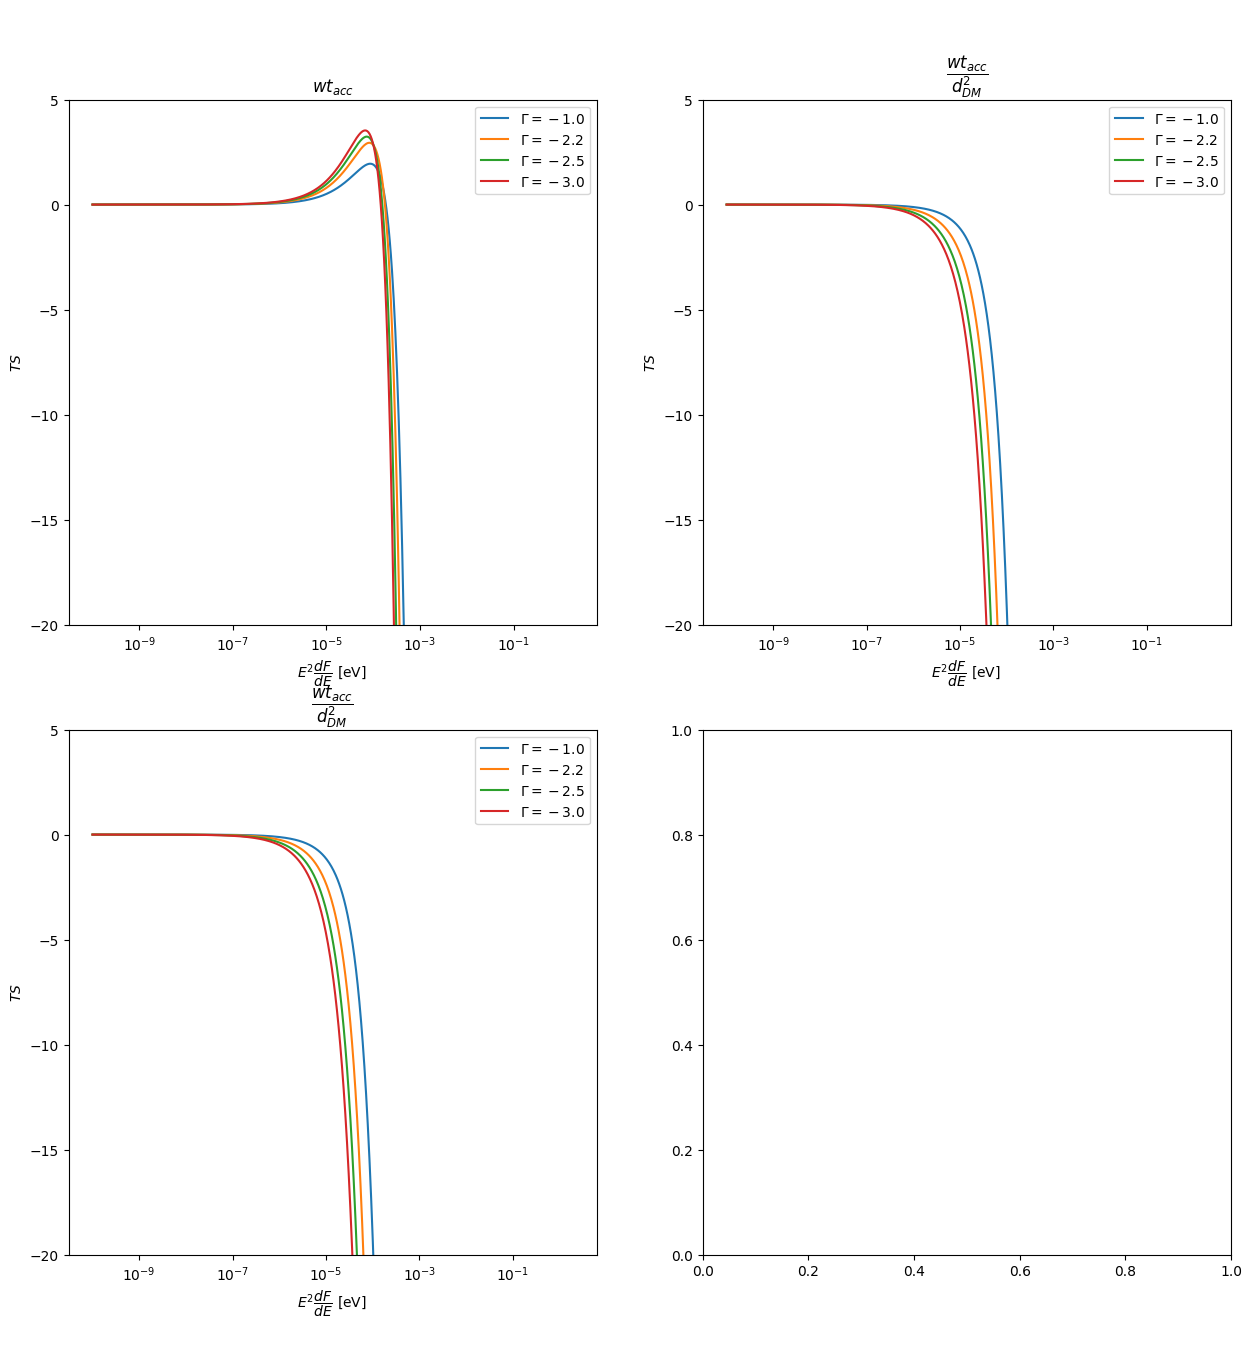

In [21]:
# plt.figure(figsize=(16, 4))
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
plt.winter()
labels = ['$wt_{acc}$', '\n\n$\dfrac{wt_{acc}}{d_{DM}^2}$', '$wt_{acc}*S_{1400}$']
for i, j in [[0,0], [0,1], [1,0]]:
    for g in range(4):
        ax[i, j].plot(e2dfde[g], all_TS[(i+j)*4+g], label=f'$\Gamma={gamma_arr[g]}$', ls=mark[0])
        
        ax[i, j].set_xscale('log')
        # ax[ws].set_yscale('log')
        # ax[ws].set_xlim(1e11, 1e19)
        ax[i, j].set_ylim(-20, 5)
        ax[i, j].set_xlabel('$E^2\dfrac{dF}{dE}$ [eV] \n')
        ax[i, j].set_ylabel('$TS$')
        ax[i, j].legend()
        ax[i, j].set_title(f'{labels[i+j]}')
    # plt.tight_layout()
    # for g in range(4):
        # ax[i, j].plot(e2dfde[g], diffuse[g]*phio, label=f'$\gamma={gamma_arr[g]}$ (diffuse $\u03BD$ flux)', ls=mark[-1])
        # ax[i, j].legend()
# ax[0, 0].set_title('wt_{acc}')

# plt.savefig('TS.png', dpi=300)
plt.show()


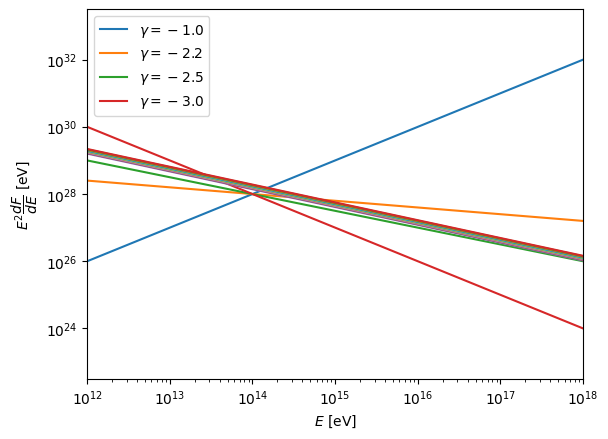

In [31]:
for i in range(4):
    plt.plot(enus, enus**2 * dfde(enus, gamma_arr[i], 1), label=f'$\gamma={gamma_arr[i]}$')
    # plt.plot(enus, e2dfde[i], label=f'$\gamma={gamma_arr[i]}$ ()')
for i in phi0_diff:
    plt.plot(enus, enus**2 * dfde(enus, -2.53, i))
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$E$ [eV]')
plt.ylabel('$E^2\dfrac{dF}{dE}$ [eV]')
plt.xlim(1e12, 1e18)
plt.show()